In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adtk.data import validate_series
from adtk.visualization import plot as ad_plot
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans

triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]

In [6]:
#func to cgange datetimeindex to normal_index
def add_index(a):
    if isinstance(a, pd.Series):
        a=a[a==True]
    indices=[]
    for i in range(len(a.index)):
        secs= str(a.index[i])[-2:]
        mins= str(a.index[i])[-5:-3]
        num= (int(mins)*60)+ int(secs)
        indices.append(num)
    if isinstance(a, pd.Series):
        a= a.to_frame() 

    a['index']= indices
    temp=list(a.columns)[:-1]
    temp.insert(0,'index')
    a=a[temp]
    
    a.reset_index(drop=True, inplace=True)
    a.set_index('index', drop=True, inplace=True)
    return a

In [7]:
#cl=no.of.clusters
def m_cluster(path, cl=30, start=0, end=20):
    df=pd.read_csv(path)
    dti=pd.date_range('00:00:00', periods= len(df), freq= "1S")
    df.set_index(dti, inplace=True)
    df=validate_series(df)
    
    c_result= []
    c_anomalies=[]
    for curr in triads[start:end]:
        min_cluster_detector = MinClusterDetector(KMeans(n_clusters=cl))
        s=df[curr]
        anomalies = min_cluster_detector.fit_detect(s)
        c_anomalies.append(anomalies)
        #return list of numeric indices
        result_set=list(add_index(anomalies).index)    
        result_set.sort()
        c_result.append(result_set)
        print(curr[0] + '+' + curr[1] + '+' + curr[2] + ' = ' + str(result_set))
    return c_result, c_anomalies, df

In [8]:
def plot_lfc_count(c_result):
    len_c=[]
    for i in range(len(c_result)):
                   len_c.append(len(c_result[i]))
    tri= ['Tr. '+ str(i) for i in range(1,21)]
    fig = plt.figure(figsize = (25, 5))
    plt.bar(tri, len_c, color ='red',width = 0.4)

BPS1+BPS21+BPS41 = [233, 234, 246, 247, 253, 254, 255, 404, 563]
BPS2+BPS22+BPS42 = [206, 207, 208, 209]
BPS3+BPS23+BPS43 = [887, 891, 892, 893, 894, 896, 897, 898, 902, 906]
BPS4+BPS24+BPS44 = [594, 595, 596, 597]
BPS5+BPS25+BPS45 = [879, 880, 902, 903, 904, 905, 906, 907, 908, 909]
BPS6+BPS26+BPS46 = [485, 486, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609]
BPS7+BPS27+BPS47 = [265, 266, 267, 268, 269, 270, 271]
BPS8+BPS28+BPS48 = [445, 446, 447, 448, 449]
BPS9+BPS29+BPS49 = [206, 207, 208, 209]
BPS10+BPS30+BPS50 = [776, 785, 791, 795, 806, 812, 831, 836, 840, 846, 861, 865, 871, 875]
BPS11+BPS31+BPS51 = [215, 216, 698, 699, 700]
BPS12+BPS32+BPS52 = [71, 161, 293]
BPS13+BPS33+BPS53 = [724, 740, 746, 774, 838, 844, 863, 884]
BPS14+BPS34+BPS54 = [110, 111, 112, 113, 114, 115, 116, 453, 454, 455, 456]
BPS15+BPS35+BPS55 = [858, 901, 902, 903, 904, 905, 906, 907, 908, 909]
BPS16+BPS36+BPS56 = [309, 310, 311, 312, 313, 314, 315, 316, 317, 318]
BPS17+BPS37+BPS57 = [683, 684, 685

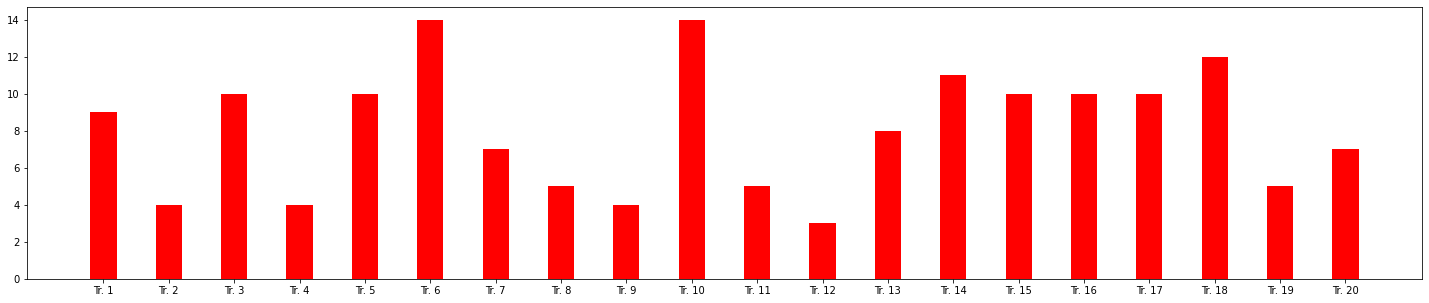

In [9]:
c_result, c_anomalies, df= m_cluster(path= 'LFC Bad data/LFC_Bad_3.csv')
plot_lfc_count(c_result)

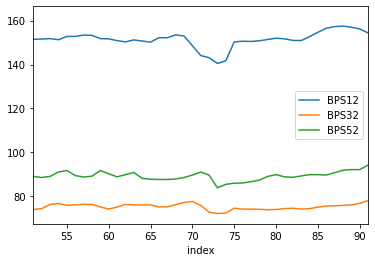

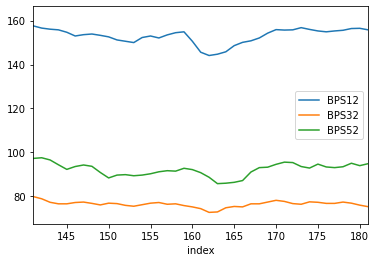

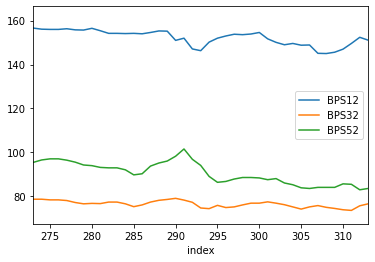

In [11]:
tno=12
df_temp=add_index(df)
df_temp
for i in c_result[tno-1]:
    df_temp[triads[tno-1]].plot(xlim=[i-20,i+20])